In [1]:
# 計算・図示用のパッケージの読み込み

import pandas as pd
import matplotlib.pyplot as plt

# 日本語の文字化け防止

import matplotlib as mpl
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)

In [2]:
# データの読み込み

df = pd.read_csv(
    'TED_1_MAR20181.csv', index_col=[3,1]).drop(
    columns=['REGION', 'COUNTRY', 'MEASURE', '2018']).loc[
    'Per Capita Income growth']

In [3]:
# データの最初の2行

df.head(2)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
ISO,,,,,,,,,,,,,,,,,,,,,
DZA,NaN,-1,2,-1,5,1,7,9,2,16,...,1,0,2,1,1,1,2,2,1,1
AGO,NaN,2,2,2,-4,6,-3,8,4,-1,...,10,-1,0,0,1,3,1,-1,-4,-1


In [4]:
# 中国のデータ
# 'CHN1' はConference Boardが再計算
# 'CHN2' は中国の公式データ

df[df.index.str.contains('CHN')]

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
ISO,,,,,,,,,,,,,,,,,,,,,
CHN1,NaN,19,10,11,-9,7,6,0,-2,-5,...,5,8,12,8,5,7,6,3,3,4
CHN2,NaN,NaN,NaN,13,2,5,13,2,18,7,...,10,9,10,9,8,8,7,7,7,7


In [5]:
#　'CHN1' を削除 

df = df.drop('CHN1', axis=0)

In [6]:
# データの行と列

df.shape

(123, 68)

In [7]:
# データのタイプと 'NaN' の確認

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, DZA to GBR
Data columns (total 68 columns):
1950    0 non-null object
1951    100 non-null object
1952    100 non-null object
1953    101 non-null object
1954    101 non-null object
1955    101 non-null object
1956    101 non-null object
1957    101 non-null object
1958    101 non-null object
1959    101 non-null object
1960    101 non-null object
1961    102 non-null object
1962    102 non-null object
1963    102 non-null object
1964    102 non-null object
1965    102 non-null object
1966    102 non-null object
1967    102 non-null object
1968    102 non-null object
1969    102 non-null object
1970    102 non-null object
1971    103 non-null object
1972    103 non-null object
1973    103 non-null object
1974    103 non-null object
1975    103 non-null object
1976    103 non-null object
1977    103 non-null object
1978    103 non-null object
1979    103 non-null object
1980    103 non-null object
1981    121 non-null object
1982

In [8]:
# データを数値タイプに変換

df = df.apply(pd.to_numeric)

In [9]:
# それぞれの国の平均成長率を計算

s_mean = df.mean(axis=1)

In [10]:
# 日本の平均成長率

s_mean['JPN']

4.358208955223881

In [11]:
# 平均成長率の最大値

s_mean.max()

7.030769230769231

In [12]:
# 平均成長率の最小値

s_mean.min()

-1.0149253731343284

In [13]:
# 最大値と最小値の差

s_mean.max() - s_mean.min()

8.04569460390356

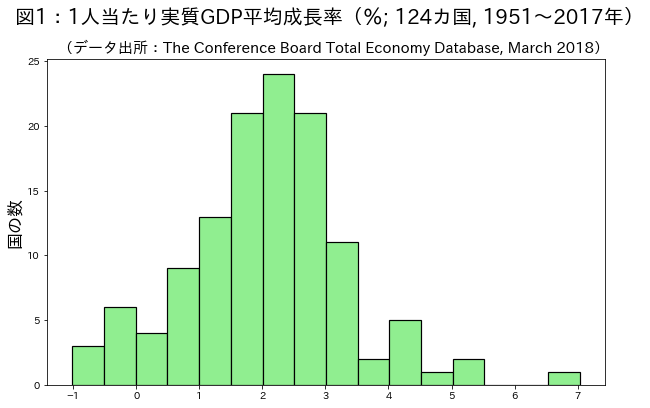

In [22]:
# ヒストグラムの作成・表示・保存

plt.subplots(figsize=[10,6])
plt.suptitle('図1：1人当たり実質GDP平均成長率（％; 124カ国, 1951〜2017年）', \
             fontsize=20, horizontalalignment='left', y=1.0, x=0.08)
plt.title("（データ出所：The Conference Board Total Economy Database, March 2018）", \
             fontsize=15, horizontalalignment='left', x=0.02)
plt.ylabel("国の数", fontsize=17)
plt.hist(s_mean, bins=16, color="lightgreen", edgecolor='black', linewidth=1.2)
plt.savefig('histogram.pdf')

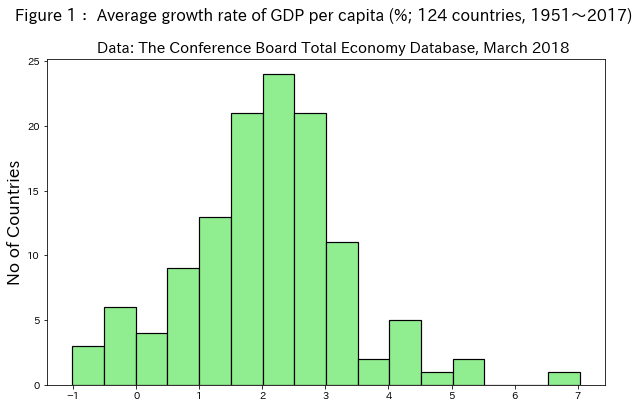

In [21]:
# ヒストグラムの作成・表示・保存（英語版）

plt.subplots(figsize=[10,6])
plt.suptitle('Figure 1： Average growth rate of GDP per capita (%; 124 countries, 1951〜2017)', 
             fontsize=16, horizontalalignment='left', y=1.0, x=0.08)
plt.title("Data: The Conference Board Total Economy Database, March 2018", \
             fontsize=15, horizontalalignment='left', x=0.09)
plt.ylabel("No of Countries", fontsize=17)
plt.hist(s_mean, bins=16, color="lightgreen", edgecolor='black', linewidth=1.2)
plt.savefig('histogram_eng.pdf')